In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import datetime as dt
import requests


In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0,8.0]

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
API_URL = 'https://api.iextrading.com/1.0'
STOCK = "AAPL" #stock symbol

In [5]:
res = requests.get(f'{API_URL}/stock/{STOCK}/chart/5y')
data = res.json()
df = pd.DataFrame(data)
df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))

In [6]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.087787,0.862466,0.086853,129.797664,130.892692,128.636554,129.767990,3.796302e+07,4.086974e+07,129.799938
std,2.138996,0.545346,1.541624,38.005896,38.361244,37.645256,38.004403,2.007289e+07,2.113151e+07,38.011988
min,-15.662800,-0.023914,-9.961000,68.024700,68.435700,67.153900,68.036500,5.704942e+06,1.147592e+07,57.336300
25%,-0.729321,0.453347,-0.597750,101.285625,102.241625,100.097150,101.259975,2.461510e+07,2.613966e+07,101.192375
50%,0.078448,0.678354,0.061500,116.966700,117.863750,115.965700,117.009550,3.361052e+07,3.553702e+07,116.939000
75%,1.062225,1.286440,0.861750,159.345000,160.727175,156.867100,159.654025,4.673783e+07,4.989645e+07,158.674600
max,11.084400,2.304220,8.198000,230.275400,231.664500,228.003100,228.995300,1.898463e+08,1.899781e+08,230.438500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


In [8]:
df.head(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-0.782734,0.000000,-1.111,69.6913,2014-03-13,70.8746,"Mar 13, 14",69.4956,70.5830,9205087,64435609,70.1013
1,-0.782740,-0.011232,-1.123,68.9085,2014-03-14,69.7228,"Mar 14, 14",68.6866,69.4470,8471356,59299492,69.0354
2,0.269229,-0.007368,0.391,69.1778,2014-03-17,69.6020,"Mar 17, 14",69.0609,69.3038,7126582,49886074,69.3514


In [9]:
X_train,X_test, Y_train,Y_test=train_test_split(df['date'],df['close'],test_size=0.3, random_state=42)

Text(0.5, 1.0, 'Training set')

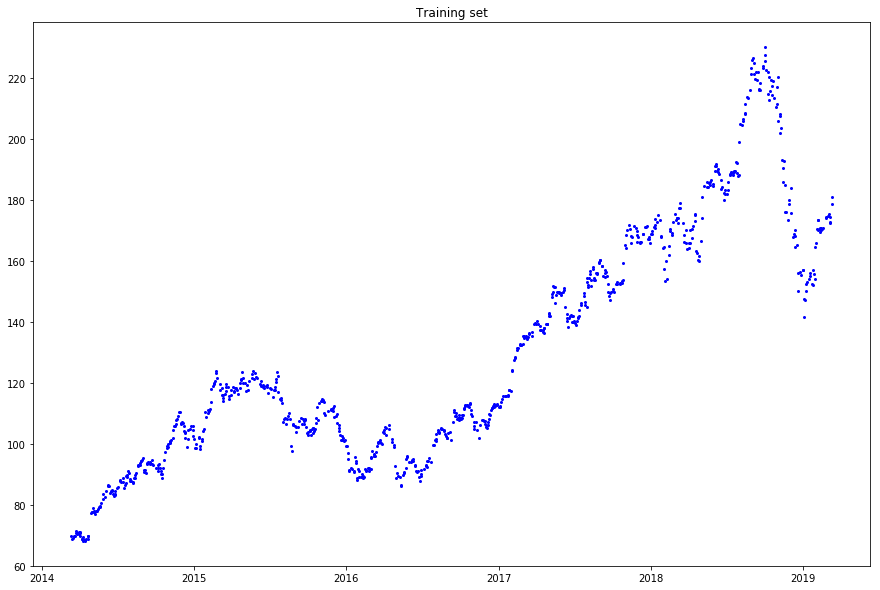

In [10]:
plt.figure(figsize=(15,10))
plt.plot(X_train, Y_train, 'bo',markersize=2)
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

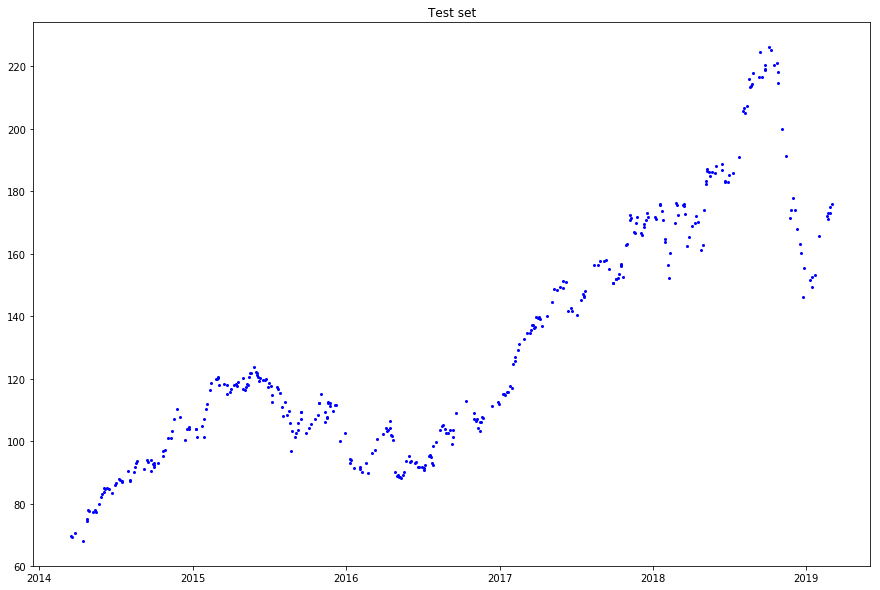

In [11]:
plt.figure(figsize=(15,10))
plt.plot(X_test, Y_test, 'bo',markersize=2)
plt.title('Test set')

In [12]:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 8)

/Users/schoentr/.local/share/virtualenvs/data_analysis-_inod1he/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: The fit may be poorly conditioned
  """


In [13]:
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

In [14]:
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

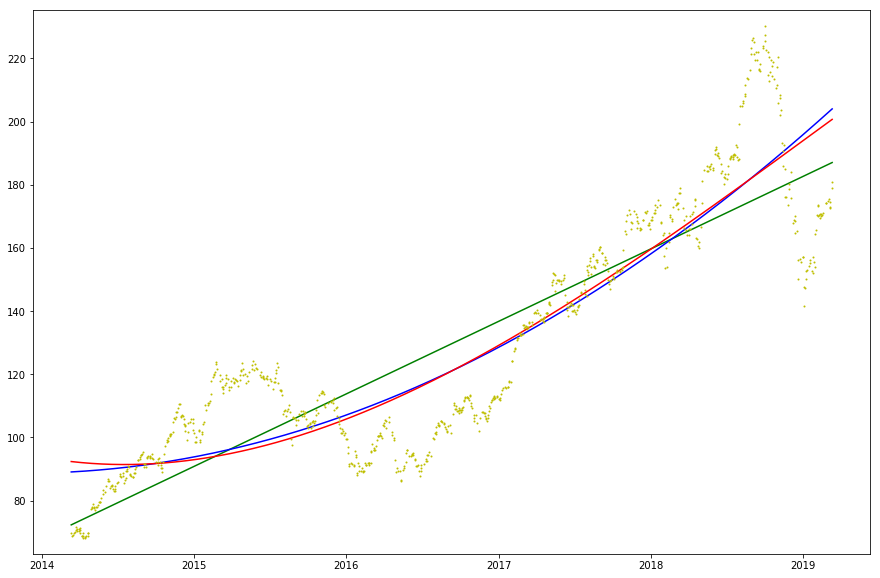

In [15]:
plt.figure(figsize=(15,10))

plt.ylim(min(Y_train - 5), max(Y_train + 5))
plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')
plt.plot(X_train, Y_train, ' y.', markersize=2)